In [1]:
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = open('survey/0621.txt', 'r')

In [37]:
f = open('0621.csv', 'a', newline='', )
f_csv = csv.writer(f)

In [ ]:
for line in data:
    line = json.loads(line)
    try:
        gateways = line['rxInfo']
        ts = line['publishedAt']
    
        for item in gateways:
            # print(item['location'])
            raw_data = [item['gatewayID'], item['rssi'], item['location']['latitude'], item['location']['longitude'], ts]
            f_csv.writerow(raw_data)
            # print(raw_data)
    except:
        pass
    # print(ts)
    #         # f_csv.writerow(raw_data)
    # cut1 = line.split('---')
    # # print(cut1[0])
    # cut2 = cut1[1].split('--')
    # # print(cut2[0])
    # jj = json.loads(cut2[0])
    # # print(jj)
    # for item in jj:
    #     print(item, '----------', jj[item])

    # # print(jj['rxInfo'])
    # try:
    #     for item in jj['rxInfo']:
    #         raw_data = [item['gatewayID'], item['rssi'], item['location']['latitude'], item['location']['longitude'], item['time']]
    #         # f_csv.writerow(raw_data)
    #         # print(raw_data)
    #         # break
    #     # break
    # except:
    #     print(jj)
    # break

In [25]:
r = pd.read_csv('raw1.csv')
r.columns = ['id', 'rssi', 'lat', 'lon', 'time']
r = r.dropna()
gateways = r['id'].drop_duplicates(keep='first')
# print(gateways)
coor = [0, 0]
coor[0] = r['lat'].drop_duplicates(keep='first').tolist()
coor[1] = r['lon'].drop_duplicates(keep='first').tolist()
# print(coor)

In [34]:
result = {'data': {'gps_data': []}}
for item in gateways:
    data = r[r.id == item]
    data = data.reset_index(drop=True)
    # print(data.shape[0])
    d = {
        "gps_acc":65.0,
        "gps_ts":1648888799,
        "lat":data.loc[0].lat,
        "lng":data.loc[0].lon,
        "lost":1,
        "rmac":data.loc[0].id,
        "rssi":-1,
        "tmac":f'{round(np.mean(data.rssi),2)} ({round(np.std(data.rssi),2)}, {data.shape[0]})',
        "ts":1648888799
    }
    result['data']['gps_data'].append(d)
json.dumps(result)

'{"data": {"gps_data": [{"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 22.3739904, "lng": 114.1112832, "lost": 1, "rmac": "Dr7+WcPZkeo=", "rssi": -1, "tmac": "-103.86 (8.35, 217)", "ts": 1648888799}, {"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 0.0, "lng": 0.0, "lost": 1, "rmac": "cNN5//6OCYg=", "rssi": -1, "tmac": "-103.62 (11.2, 161)", "ts": 1648888799}, {"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 22.3625842, "lng": 114.1195748, "lost": 1, "rmac": "dKyHkOpmIg8=", "rssi": -1, "tmac": "-100.74 (9.39, 147)", "ts": 1648888799}, {"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 22.29998, "lng": 114.1729, "lost": 1, "rmac": "9oM/P/6EQcI=", "rssi": -1, "tmac": "-98.4 (9.39, 146)", "ts": 1648888799}, {"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 0.0, "lng": 0.0, "lost": 1, "rmac": "ZH/a//4Aaqg=", "rssi": -1, "tmac": "-100.1 (8.64, 60)", "ts": 1648888799}, {"gps_acc": 65.0, "gps_ts": 1648888799, "lat": 0.0, "lng": 0.0, "lost": 1, "rmac": "cNN5//6OCKg=", "rssi": -1, "tmac": "-93.58 (5.08, 2

In [15]:
# {"data":{"count":1,"count_end_ts":1648901940,"count_start_ts":1648888260,"gps_data":[]
# {"gps_acc":65.0,"gps_ts":1648888799,"lat":22.322736,"lng":114.16749,"lost":1,"rmac":"e64c8","rssi":-87,"tmac":"111965","ts":1648888802}

result = {'data': {'gps_data': []}}
idx = 0
while idx < len(r):
    d = {
        "gps_acc":65.0,
        "gps_ts":1648888799,
        "lat":r.loc[idx].lat,
        "lng":r.loc[idx].lon,
        "lost":1,
        "rmac":r.loc[idx].id,
        "rssi":-87,
        "tmac":"111965",
        "ts":1648888799
    }
    result['data']['gps_data'].append(d)
    # print(d)
    idx += 1
    # break


In [ ]:
json.dumps(result)

In [92]:
gate = r[(r.id == 'dKyHkOpmIg8=')]
gate = gate.reset_index(drop=True)

gate1 = r[(r.id == '9oM/P/6EQcI=')]
gate1 = gate1.reset_index(drop=True)

gate2 = r[(r.id == 'Dr7+WcPZkeo=')]
gate2 = gate2.reset_index(drop=True)

In [88]:
gate

,id,rssi,lat,lon,time
0,dKyHkOpmIg8=,-108,22.362584,114.119575,2022-06-06T04:03:22Z
1,dKyHkOpmIg8=,-108,22.362584,114.119575,2022-06-06T04:03:22Z
2,dKyHkOpmIg8=,-102,22.362584,114.119575,2022-06-06T04:03:24Z
3,dKyHkOpmIg8=,-102,22.362584,114.119575,2022-06-06T04:03:24Z
4,dKyHkOpmIg8=,-108,22.362584,114.119575,2022-06-06T04:03:26Z
...,...,...,...,...,...
5408,dKyHkOpmIg8=,-105,22.362584,114.119575,2022-06-06T08:40:40Z
5409,dKyHkOpmIg8=,-114,22.362584,114.119575,2022-06-06T08:40:42Z
5410,dKyHkOpmIg8=,-110,22.362584,114.119575,2022-06-06T08:40:42Z
5411,dKyHkOpmIg8=,-110,22.362584,114.119575,2022-06-06T08:41:59Z


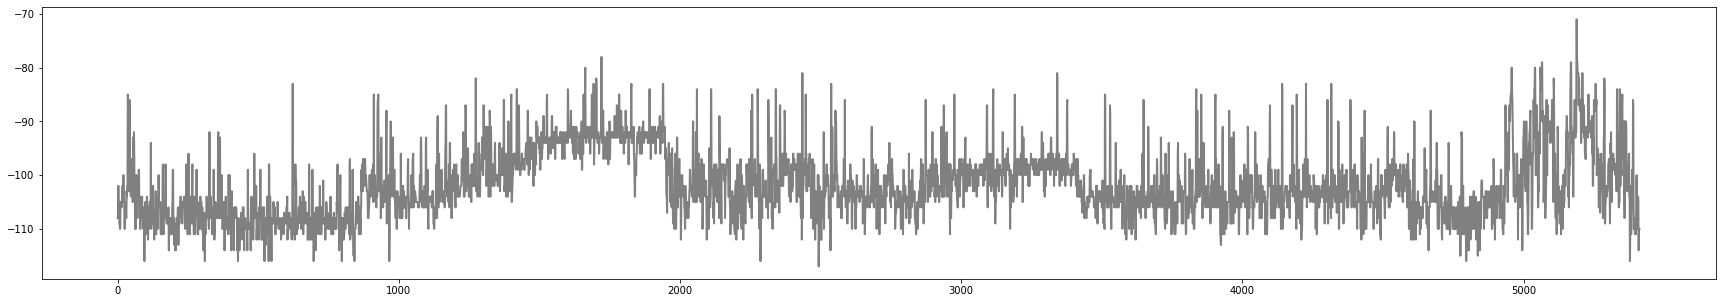

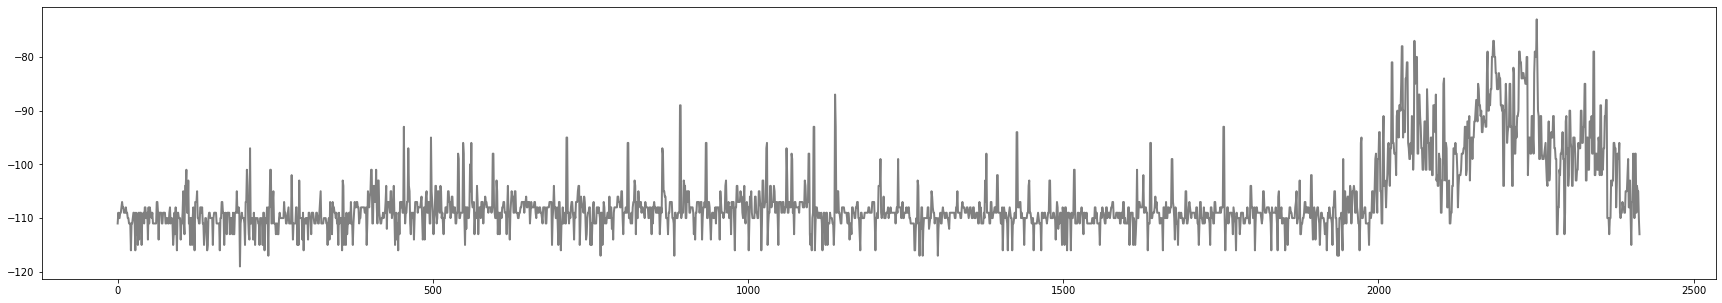

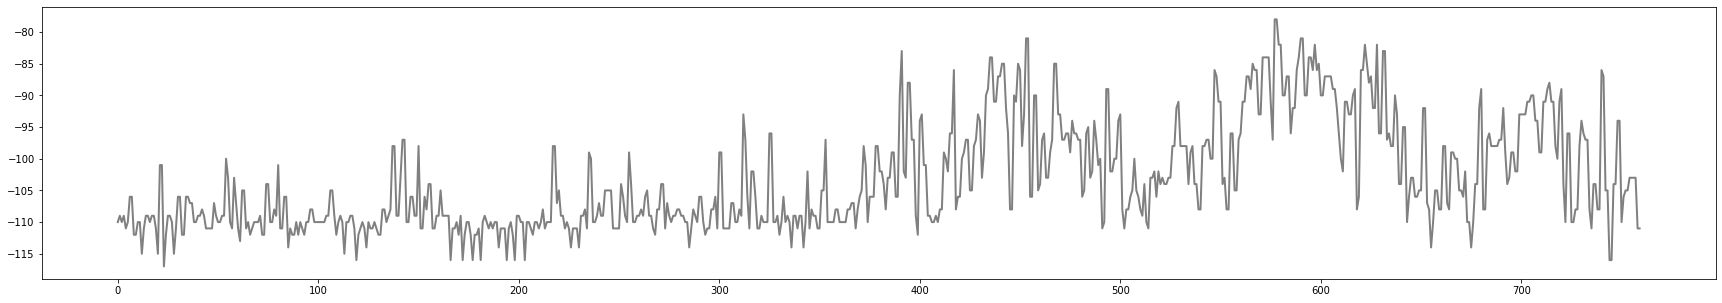

In [94]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(gate.rssi, linewidth=2, color='grey', label='raw data (a_x)', )

fig, ax = plt.subplots(figsize=(30,5))
ax.plot(gate1.rssi, linewidth=2, color='grey', label='raw data (a_x)', )

fig, ax = plt.subplots(figsize=(30,5))
ax.plot(gate2.rssi, linewidth=2, color='grey', label='raw data (a_x)', )

In [95]:
gate1.to_csv('gate1.csv')